## Importing Basic Libraries

In [16]:
import numpy as np
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
from sklearn import svm
import pickle

## Loading MNIST Dataset

In [17]:
digits=load_digits()
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
print(data)
X_train,X_test,y_train,y_test=train_test_split(digits.data,digits.target,test_size=0.25,random_state=0)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


## Setting the ColorMap

In [18]:
plt.set_cmap('viridis')

<Figure size 640x480 with 0 Axes>

# Checking Image Data

Image Array:-
 [[ 0.  0.  0.  1. 11.  0.  0.  0.]
 [ 0.  0.  0.  7.  8.  0.  0.  0.]
 [ 0.  0.  1. 13.  6.  2.  2.  0.]
 [ 0.  0.  7. 15.  0.  9.  8.  0.]
 [ 0.  5. 16. 10.  0. 16.  6.  0.]
 [ 0.  4. 15. 16. 13. 16.  1.  0.]
 [ 0.  0.  0.  3. 15. 10.  0.  0.]
 [ 0.  0.  0.  2. 16.  4.  0.  0.]]

Result:-  4


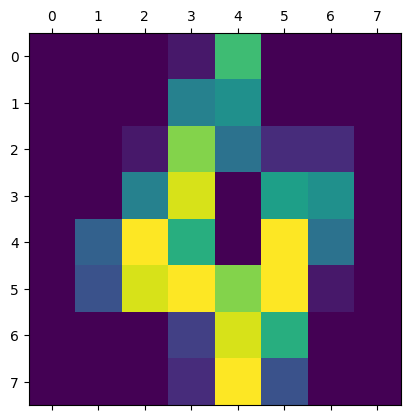

In [19]:
a=digits.images[4]
b=digits.target[4]
print("Image Array:-\n",a,end="\n\n")
print("Result:- ",b)
plt.matshow(a)

# Training Model

In [20]:
model=svm.SVC(probability=True,gamma=0.001)
model.fit(X_train,y_train)
predicted=model.predict_proba(X_test)*100
print(X_test,X_test.shape,"\n",y_test,y_test.shape,"\n")
print(predicted[0].max(),predicted[0].argmax())

[[ 0.  0. 11. ... 13. 16.  8.]
 [ 0.  1. 15. ...  1.  0.  0.]
 [ 0.  2. 13. ... 16. 16.  3.]
 ...
 [ 0.  0. 11. ...  7.  0.  0.]
 [ 0.  0.  5. ...  7.  0.  0.]
 [ 0.  2. 14. ...  6.  0.  0.]] (450, 64) 
 [2 8 2 6 6 7 1 9 8 5 2 8 6 6 6 6 1 0 5 8 8 7 8 4 7 5 4 9 2 9 4 7 6 8 9 4 3
 1 0 1 8 6 7 7 1 0 7 6 2 1 9 6 7 9 0 0 5 1 6 3 0 2 3 4 1 9 2 6 9 1 8 3 5 1
 2 8 2 2 9 7 2 3 6 0 5 3 7 5 1 2 9 9 3 1 7 7 4 8 5 8 5 5 2 5 9 0 7 1 4 7 3
 4 8 9 7 9 8 2 6 5 2 5 8 4 8 7 0 6 1 5 9 9 9 5 9 9 5 7 5 6 2 8 6 9 6 1 5 1
 5 9 9 1 5 3 6 1 8 9 8 7 6 7 6 5 6 0 8 8 9 8 6 1 0 4 1 6 3 8 6 7 4 5 6 3 0
 3 3 3 0 7 7 5 7 8 0 7 8 9 6 4 5 0 1 4 6 4 3 3 0 9 5 9 2 1 4 2 1 6 8 9 2 4
 9 3 7 6 2 3 3 1 6 9 3 6 3 2 2 0 7 6 1 1 9 7 2 7 8 5 5 7 5 2 3 7 2 7 5 5 7
 0 9 1 6 5 9 7 4 3 8 0 3 6 4 6 3 2 6 8 8 8 4 6 7 5 2 4 5 3 2 4 6 9 4 5 4 3
 4 6 2 9 0 1 7 2 0 9 6 0 4 2 0 7 9 8 5 4 8 2 8 4 3 7 2 6 9 1 5 1 0 8 2 1 9
 5 6 8 2 7 2 1 5 1 6 4 5 0 9 4 1 1 7 0 8 9 0 5 4 3 8 8 6 5 3 4 4 4 8 8 7 0
 9 6 3 5 2 3 0 8 3 3 1 3 3 0 0 4 6 0 7 7 6 2 0

# Plotting Confusion Matrix

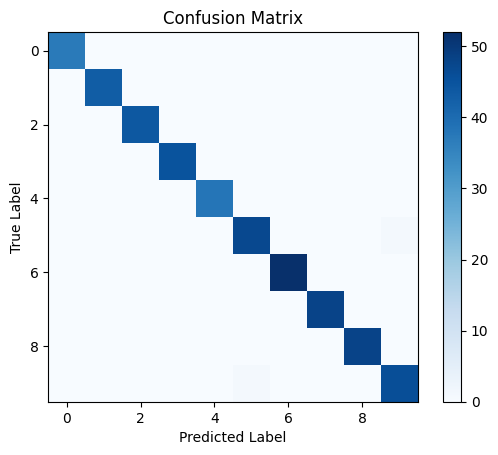

Accuracy of the Algorithm: 0.9955555555555555


In [21]:
import matplotlib.pyplot as plt
from sklearn import metrics

# Compute the confusion matrix
disp = metrics.confusion_matrix(y_test, model.predict(X_test))

# Create a confusion matrix plot
plt.figure()
plt.imshow(disp, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Print accuracy
print("Accuracy of the Algorithm:", model.score(X_test, y_test))


# Saving The Model

In [22]:
pickle.dump(model, open("mnist.pkl", 'wb'))

# Creating GUI

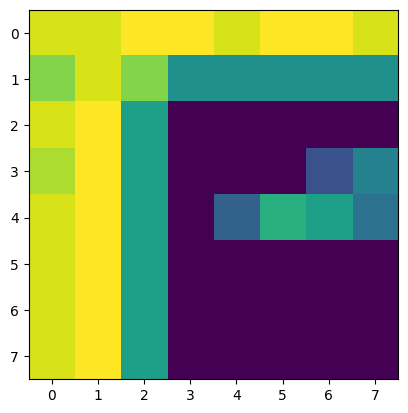

In [23]:
from tkinter import *
import tkinter as tk
import win32gui
from PIL import ImageGrab, Image
model=pickle.load(open("mnist.pkl","rb"))


def predict_digit(img):
    img = np.array(img.resize((8,8)).convert('L'))
    img = 16-np.multiply(img,0.06274509803921568627450980392157).astype(int).astype(float)
    img[img<3]=0
    plt.imshow(img)     
    res = model.predict_proba(img.reshape(1,-1))*100
    return res[0].max(),res[0].argmax()

class App(tk.Tk):
    def __init__(self):
        tk.Tk.__init__(self)
        self.x = self.y = 0
        self.canvas = tk.Canvas(self, width=300, height=300, bg = "white", cursor="cross")
        self.label = tk.Label(self, text="Draw Something..", font=("Helvetica", 48))
        self.classify_btn = tk.Button(self, text = "Recognise", command = self.classify_handwriting) 
        self.button_clear = tk.Button(self, text = "Clear", command = self.clear_all)
        self.canvas.grid(row=0, column=0, pady=2, sticky=W, )
        self.label.grid(row=0, column=1,pady=2, padx=2)
        self.classify_btn.grid(row=1, column=1, pady=2, padx=2)
        self.button_clear.grid(row=1, column=0, pady=2)
        self.canvas.bind("<B1-Motion>", self.draw_lines)
    def clear_all(self):
        self.canvas.delete("all")
        self.label.configure(text="Draw Something..")
    def classify_handwriting(self):
        HWND = self.canvas.winfo_id()
        rect = win32gui.GetWindowRect(HWND)
        im = ImageGrab.grab(rect)
        acc,digit = predict_digit(im)
        self.label.configure(text= "Guessed Digit:- "+str(digit))
    def draw_lines(self, event):
        self.x = event.x
        self.y = event.y
        r=8
        self.canvas.create_oval(self.x-r, self.y-r, self.x + r, self.y + r, fill='black')
app = App()
mainloop()